**Table of contents**<a id='toc0_'></a>    
- 1. [Imports](#toc1_)    
- 2. [Model class](#toc2_)    
  - 2.1. [Basic Edgeworth box](#toc2_1_)  
  - 2.2. [Market Clearing Condition](#toc2_2_)  
  - 2.3. [Market Clearing Price](#toc2_3_)  
  - 2.4. [A chooses own consumption](#toc2_4_)    
  - 2.5. [A chooses B's consumption](#toc2_5_)  
  - 2.6. [Social planner chooses A's and B's consumption](#toc2_6_)
  - 2.7. [Draw a random set](#toc2_7_)    
  - 2.8. [Advanced Edgeworth Box](#toc2_8_)  

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Imports](#toc0_)

In [29]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2. <a id='toc2_'></a>[Model class](#toc0_)

In [30]:
from ExchangeEconomy import *

### 2.1. <a id='toc2_1_'></a>[Basic Edgeworth box](#toc0_)

In [31]:
model = ExchangeEconomyClass2()

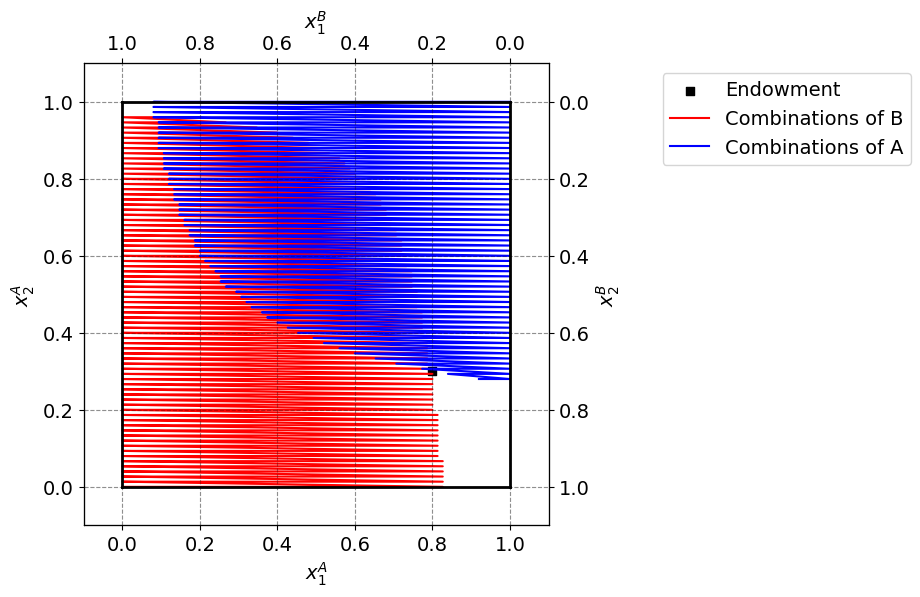

In [32]:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='Endowment')

# call the method from class
model.plot_utilities(ax_A)

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.8,1.0));

plt.show()

From this graph we can see that all the pairs of combinations of xA1 and xA2 that leave both players, as least as well off as they were when consuming their endowments, are in the area where the two zones overlap.

### 2.2. <a id='toc2_1_'></a>[Market clearing condition](#toc0_)

In [33]:
# create an array of values for p1 :
p1 = np.arange(0.5, 2.5, 2 * model.par.N)

# call the method from class :
esp1,esp2 = model.check_market_clearing(p1)

# print the error market clearing condition for each good : 
print("The error market clearing condition for the good 1 is ", f'{float(esp1):.2f}') 
print("The error market clearing condition for the good 2 is", f'{float(esp2):.2f}')

The error market clearing condition for the good 1 is  0.53
The error market clearing condition for the good 2 is -0.27


### 2.3. <a id='toc2_1_'></a>[Clearing market price ](#toc0_)

In [34]:
print("The clearing market price is", f'{float(p1):.2f}')

The clearing market price is 0.50


### 2.4. <a id='toc2_1_'></a>[A chooses own consumption](#toc0_)

In [35]:
# create an array of values for p1 
p1 = np.arange(0.5, 2.5, 2 * par.N) 

# call the method from class :
p1_optimal,x1A_optimal,x2A_optimal,x1B_optimal,x2B_optimal = model.find_allocation(p1)

# print the solutions
print("Optimal price (p1):", f'{p1_optimal:.2f}')
print("Allocation for agent A:")
print("x1A*:", f'{x1A_optimal:.2f}')
print("x2A*:", f'{x2A_optimal:.2f}')
print("Allocation for agent B:")
print("x1B*:", f'{x1B_optimal:.2f}')
print("x2B*:", f'{x2B_optimal:.2f}')

Optimal price (p1): 1.90
Allocation for agent A:
x1A*: 0.62
x2A*: 0.64
Allocation for agent B:
x1B*: 0.38
x2B*: 0.36


In [36]:
# new price array : p1 can take all positive values : 
p1 = np.arange(0,par.N) 

# call the method from class
p1_optimal,x1A_optimal,x2A_optimal,x1B_optimal,x2B_optimal = model.find_allocation(p1)

# print the solutions
print("Optimal price (p1):", f'{p1_optimal:.2f}')
print("Allocation for agent A:")
print("x1A*:", f'{x1A_optimal:.2f}')
print("x2A*:", f'{x2A_optimal:.2f}')
print("Allocation for agent B:")
print("x1B*:", f'{x1B_optimal:.2f}')
print("x2B*:", f'{x2B_optimal:.2f}')

Optimal price (p1): 1.90
Allocation for agent A:
x1A*: 0.62
x2A*: 0.64
Allocation for agent B:
x1B*: 0.38
x2B*: 0.36


We can see that there is no difference between the two solutions since the optimal price was within the price array at first. Therefore, widening the array does not change the solution (it would have changed if it had impacted the utility functions for instance). 

### 2.5. <a id='toc2_1_'></a>[A chooses B's consumption](#toc0_)

In [46]:
# call the method from class :
p1_optimal, x1A_optimal, x2A_optimal, x1B_optimal, x2B_optimal =model.find_allocation_in_C()

# print the solutions
print("Optimal price (p1):", f'{p1_optimal:.2f}')
print("Allocation for agent A:")
print("x1A*:", f'{x1A_optimal:.2f}')
print("x2A*:", f'{x2A_optimal:.2f}')
print("Allocation for agent B:")
print("x1B*:", f'{x1B_optimal:.2f}')
print("x2B*:", f'{x2B_optimal:.2f}')

Optimal price (p1): 0.66
Allocation for agent A:
x1A*: 1.00
x2A*: 1.00
Allocation for agent B:
x1B*: 0.00
x2B*: 0.00


In [47]:
# call the method from class
p1_optimal, x1A_optimal, x2A_optimal, x1B_optimal, x2B_optimal =model.find_allocation_no_restrictions()

# print the solutions
print("Optimal price (p1):", f'{p1_optimal:.2f}')
print("Allocation for agent A:")
print("x1A*:", f'{x1A_optimal:.2f}')
print("x2A*:", f'{x2A_optimal:.2f}')
print("Allocation for agent B:")
print("x1B*:", f'{x1B_optimal:.2f}')
print("x2B*:", f'{x2B_optimal:.2f}')

Optimal price (p1): 0.66
Allocation for agent A:
x1A*: 1.00
x2A*: 1.00
Allocation for agent B:
x1B*: 0.00
x2B*: 0.00


### 2.6. <a id='toc2_1_'></a>[Social planner chooses A's and B's consumption](#toc0_)

In [40]:
# call the method from the class :
allocation_resulting = model.find_resulting_allocation()

# print the results : 
print("Resulting allocation that maximizes the sum of utilities:")
print("xA1*:", f'{allocation_resulting[0]:.2f}')
print("xA2*:", f'{allocation_resulting[1]:.2f}')

Resulting allocation that maximizes the sum of utilities:
xA1*: 0.33
xA2*: 0.67


### 2.7. <a id='toc2_1_'></a>[Draw a random set](#toc0_)

In [41]:
# generate random set with 50 elements :
np.random.seed(42)
W = np.random.rand(50, 2) 

# find market equilibrium allocation for each ωA ∈ W :
allocations = []
for omegaA in W:
    allocations.append(model.find_equilibrium_allocation(omegaA))

### 2.8. <a id='toc2_1_'></a>[Advanced Edgeworth box](#toc0_)

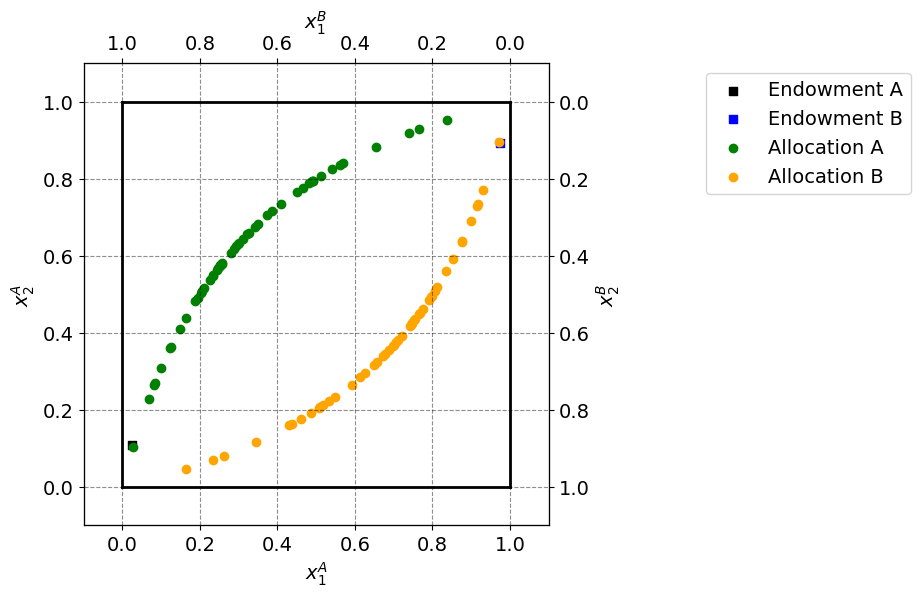

In [42]:
# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# endowments
ax_A.scatter(model.par.w1A, model.par.w2A, marker='s',color='black', label='Endowment A')
ax_A.scatter(1 - model.par.w1A, 1 - model.par.w2A,marker ='s',color='blue', label='Endowment B')

# plot allocations
x1A_values, x2A_values, x1B_values, x2B_values = zip(*allocations)
ax_A.scatter(x1A_values, x2A_values, color='green', label='Allocation A')
ax_A.scatter(x1B_values, x2B_values, color='orange', label='Allocation B')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.8,1.0));

plt.show()